# Problem Statement: Maple Syrup Distribution Network

In the heart of Canada, a vast network of pipelines has been established to transport the highly prized Canadian maple syrup from production sites to distribution centers. Cities from Argentia to Inuvik are connected through this network, ensuring the sweet treat reaches every corner of the country. However, a recent logistical challenge has arisen, requiring an optimization of the syrup flow through the network to meet an unprecedented surge in demand.

Your task is to develop a program that calculates the maximum amount of maple syrup that can be transported from the primary production site to the main distribution center in one operation. The network is represented as a directed graph where cities represent nodes, and pipelines between cities represent edges. Each pipeline has a maximum capacity of maple syrup it can transport at once.

## Notes for Solving

Participants should use a graph algorithm capable of solving the maximum flow problem, such as the Ford-Fulkerson method, Edmonds-Karp algorithm, or Dinic's algorithm. Attention to detail in handling the specific capacities of pipelines and efficiently navigating the network will be critical for developing a solution that meets the surge in demand within the constraints.


## Explanation of the Dataset
This dataset forms a network with several routes from Argentia to Inuvik. The capacities vary, indicating the maximum amount of maple syrup (in liters) that each pipeline can transport in one operation. Some cities like Edmonton and Halifax serve as crucial junctions with multiple incoming and outgoing routes, potentially acting as bottlenecks or key points for maximizing the flow.

Participants would need to analyze this network to find the maximum flow of maple syrup from Argentia to Inuvik.

Submit:
Source code as file

Answer to Maximum Flow from Argentia to Inuvik as text field

In [ ]:
# basic idea would be to read the canadian_cities.txt file
# parse the data into some graph structure
# then use the graph to find the maximum flow from one Argentia to Inuvik
# for now let's use an existing library to do the graph stuff
# one good choice is networkx

## NetworkX Library

![NetworkX](https://networkx.org/documentation/stable/_static/networkx_banner.svg)

The NetworkX library is used to represent the network as a directed graph and calculate the maximum flow. The graph is created using the `DiGraph` class, and the maximum flow is calculated using the `maximum_flow` function. The maximum flow is calculated from the source node (Argentia) to the sink node (Inuvik). The maximum flow value is then printed.

Library Documentation: https://networkx.github.io/documentation/stable/index.html

In [1]:
# first we will install it if we don't have it
try:
    import networkx as nx
except ImportError:
    print("Installing networkx")
    import subprocess
    subprocess.call(['pip', 'install', 'networkx'])
    import networkx as nx

# print version
print(nx.__version__)

3.2.1


In [2]:
# To find Maximum Flow in NetworkX, we can use the edmonds_karp algorithm

# read the file
with open('canadian_cities.txt', 'r') as f:
    data = f.readlines()
# our data is a list of Two City names and a number indicating the flow capacity between them in one direction
# we will parse this data into a graph
G = nx.DiGraph()
for line in data:
    city1, city2, capacity = line.split()
    G.add_edge(city1, city2, capacity=int(capacity))

# now we can find the maximum flow
flow_value, flow_dict = nx.maximum_flow(G, 'Argentia', 'Inuvik')

print(f"Maximum flow from Argentia to Inuvik is {flow_value}")
# print the flow dictionary
print(flow_dict)

Maximum flow from Argentia to Inuvik is 2500
{'Argentia': {'Brandon': 1700, 'Calgary': 800}, 'Brandon': {'Dartmouth': 700, 'Edmonton': 1000}, 'Calgary': {'Fredericton': 0, 'Edmonton': 800, 'Dartmouth': 0}, 'Dartmouth': {'Guelph': 700, 'Fredericton': 0}, 'Edmonton': {'Halifax': 800, 'Inuvik': 1000}, 'Fredericton': {'Guelph': 0}, 'Guelph': {'Halifax': 700}, 'Halifax': {'Inuvik': 1500}, 'Inuvik': {}}


C:\Users\val-wd\AppData\Local\Temp\ipykernel_9532\2107348688.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


''

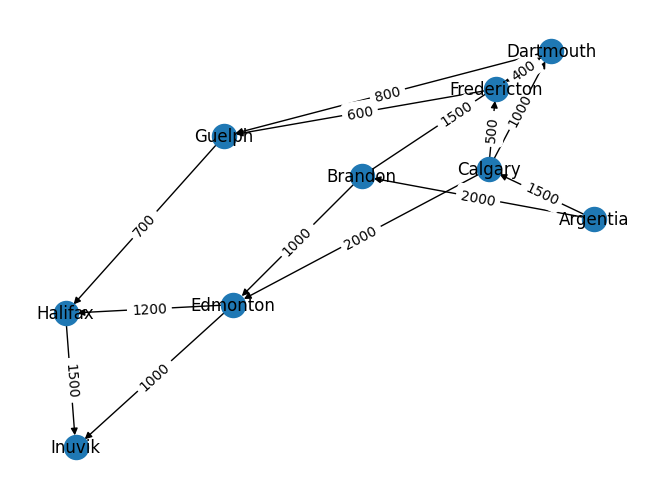

In [4]:
# let's plot our solution
import matplotlib.pyplot as plt
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
# adjust layout
plt.tight_layout()
;


In [6]:
# lets print our flow_dict again
print(flow_dict)

{'Argentia': {'Brandon': 1700, 'Calgary': 800}, 'Brandon': {'Dartmouth': 700, 'Edmonton': 1000}, 'Calgary': {'Fredericton': 0, 'Edmonton': 800, 'Dartmouth': 0}, 'Dartmouth': {'Guelph': 700, 'Fredericton': 0}, 'Edmonton': {'Halifax': 800, 'Inuvik': 1000}, 'Fredericton': {'Guelph': 0}, 'Guelph': {'Halifax': 700}, 'Halifax': {'Inuvik': 1500}, 'Inuvik': {}}


C:\Users\val-wd\AppData\Local\Temp\ipykernel_9532\4026994227.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


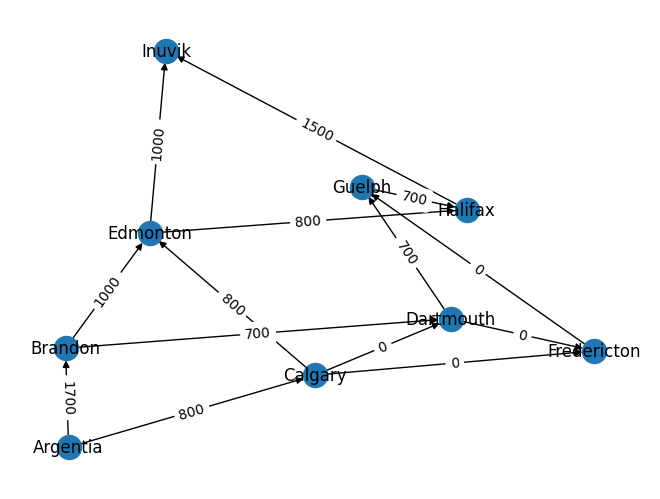

In [9]:
# let's make a new graph with the solution and plot it
H = nx.DiGraph()
for city1, targets in flow_dict.items():
    for city in targets:
        H.add_edge(city1, city, capacity=targets[city])

# let's plot our solution
pos = nx.spring_layout(H)
nx.draw(H, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(H, 'capacity')
nx.draw_networkx_edge_labels(H, pos, edge_labels=edge_labels)
# adjust layout to be circular
plt.tight_layout()
plt.show()

In [11]:
# let's use pyvis to visualize the graph
# first try installing it
try:
    import pyvis
except ImportError:
    import subprocess
    print("Installing pyvis")
    subprocess.call(['pip', 'install', 'pyvis'])
    import pyvis

# print version
print(pyvis.__version__)

Installing pyvis
0.3.2


In [12]:
# let's visualize our H graph
# we can use the networkx_to_pyvis function
from pyvis.network import Network
g = Network(notebook=True)
g.from_nx(H)
g.show("H.html")
# let's open the file


H.html


In [14]:
# let's try a simple example of visualizing a graph using pyvis

G1 = nx.Graph()
G1.add_node(1, color='blue', size=30, label='Node 1')
G1.add_node(2, color='red', size=20, label='Node 2')
G1.add_edge(1, 2, weight=3, title='Edge Title')

net = Network(notebook=True)
net.from_nx(G1)
net.show_buttons(filter_=['capacity'])
net.show("G1.html")

G1.html


In [ ]:
# TODO figure out how to display edge weights and labels in pyvis

# let's try to visualize the original graph

g = Network(notebook=True)
g.from_nx(G)
g.show("G.html")

In [16]:
nx_graph = nx.cycle_graph(10)
nx_graph.nodes[1]['title'] = 'Number 1'
nx_graph.nodes[1]['group'] = 1
nx_graph.nodes[3]['title'] = 'I belong to a different group!'
nx_graph.nodes[3]['group'] = 10
nx_graph.add_node(20, size=20, title='couple', group=2)
nx_graph.add_node(21, size=15, title='couple', group=2)
nx_graph.add_edge(20, 21, weight=5)
nx_graph.add_node(25, size=25, label='lonely', title='lonely node', group=3)
nt = Network("500px", "500px", notebook=True)
# populates the nodes and edges data structures
nt.from_nx(nx_graph)
nt.show("nx.html")

nx.html
